In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200529_Lick_3-m_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200529_Lick_3-m

## Si II 6355

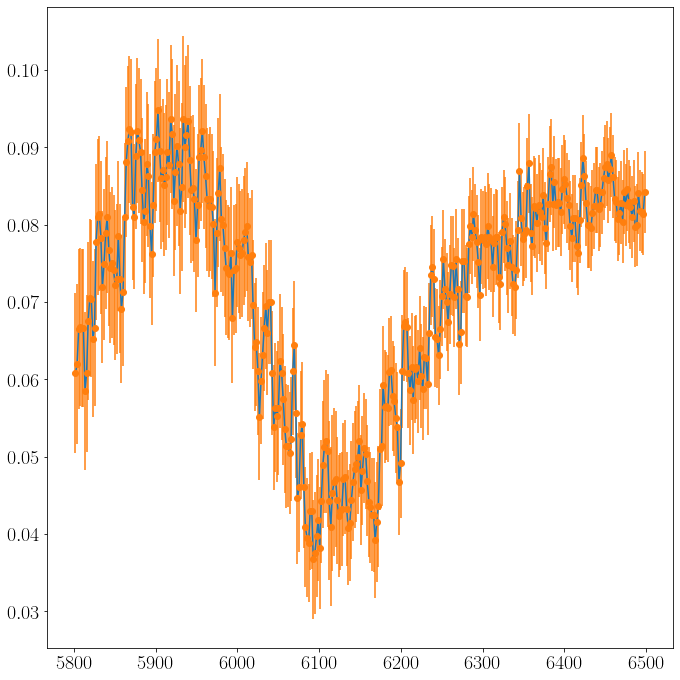

In [3]:
Spec1.plot_line_region(5800, 6500)

In [4]:
Spec1.add_line('SiII_6355', 5900, 6400, lines=[6371.359, 6347.103])

258 points within 5900.00 and 6400.00 angstroms.


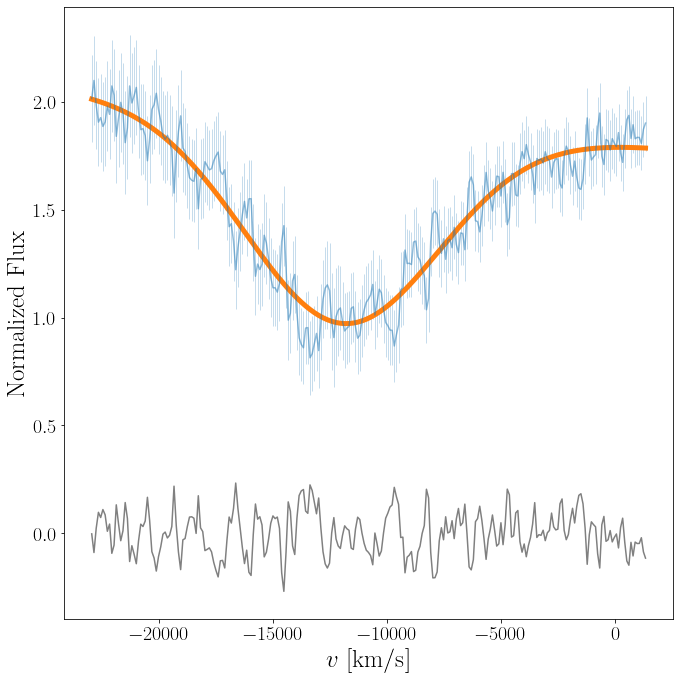

LS estimation:
Velocity pvf: -11426 km/s


In [5]:
Spec1.line['SiII_6355'].LS_estimator()

 11%|█         | 5600/50000 [01:56<15:26, 47.94it/s]


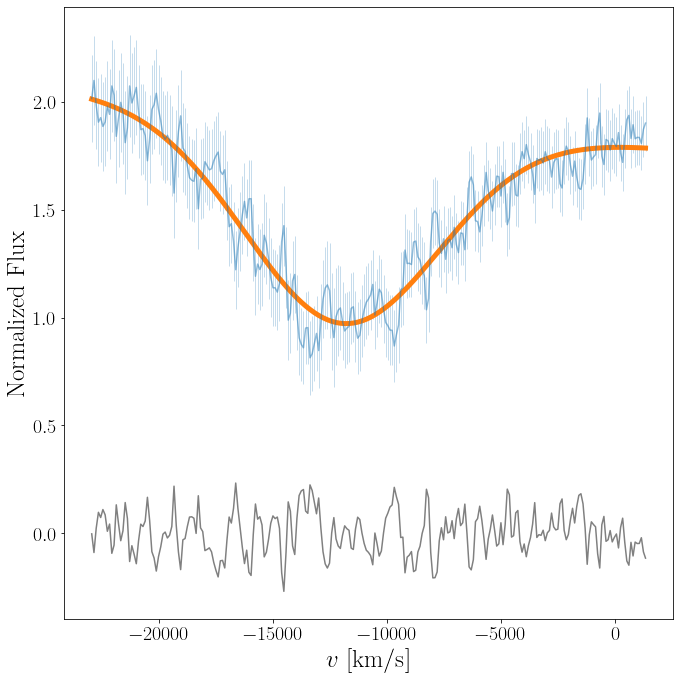

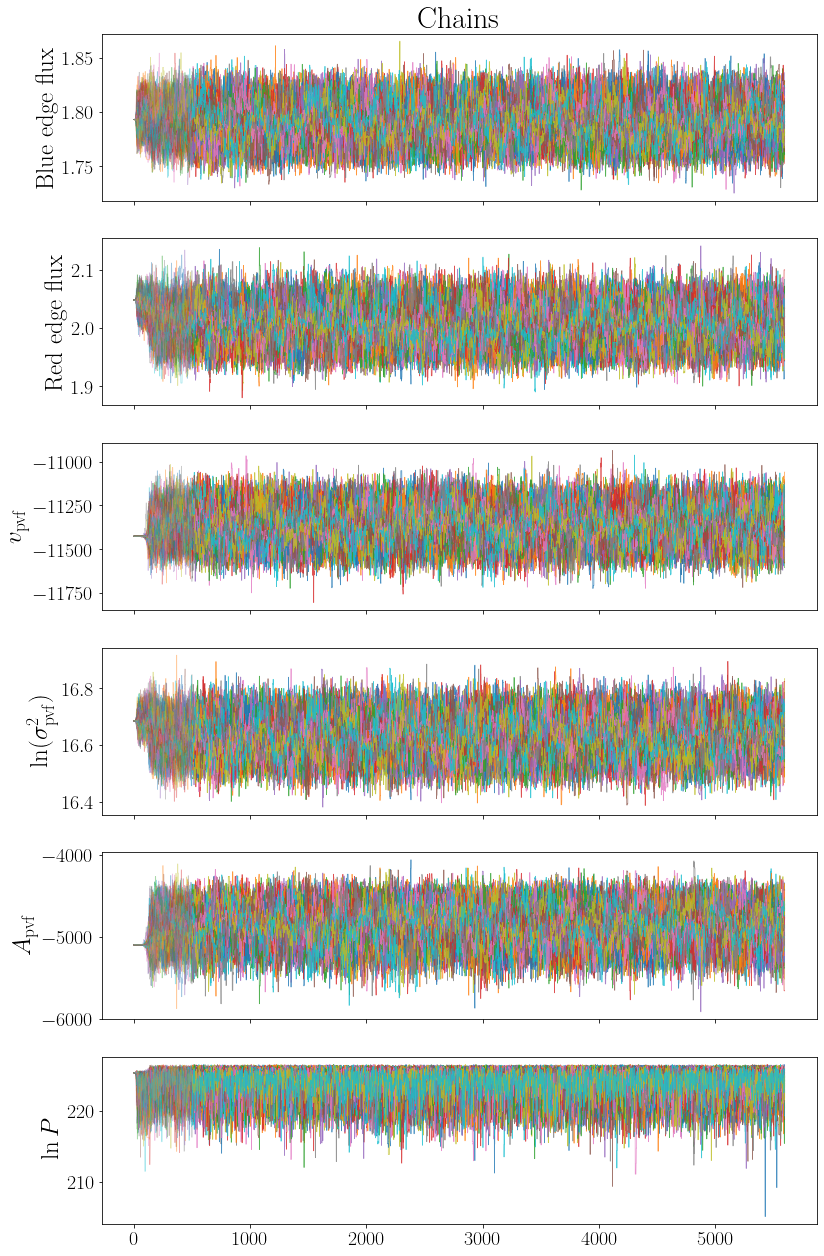

MCMC results:
Velocity pvf: -11356 pm 91 km/s


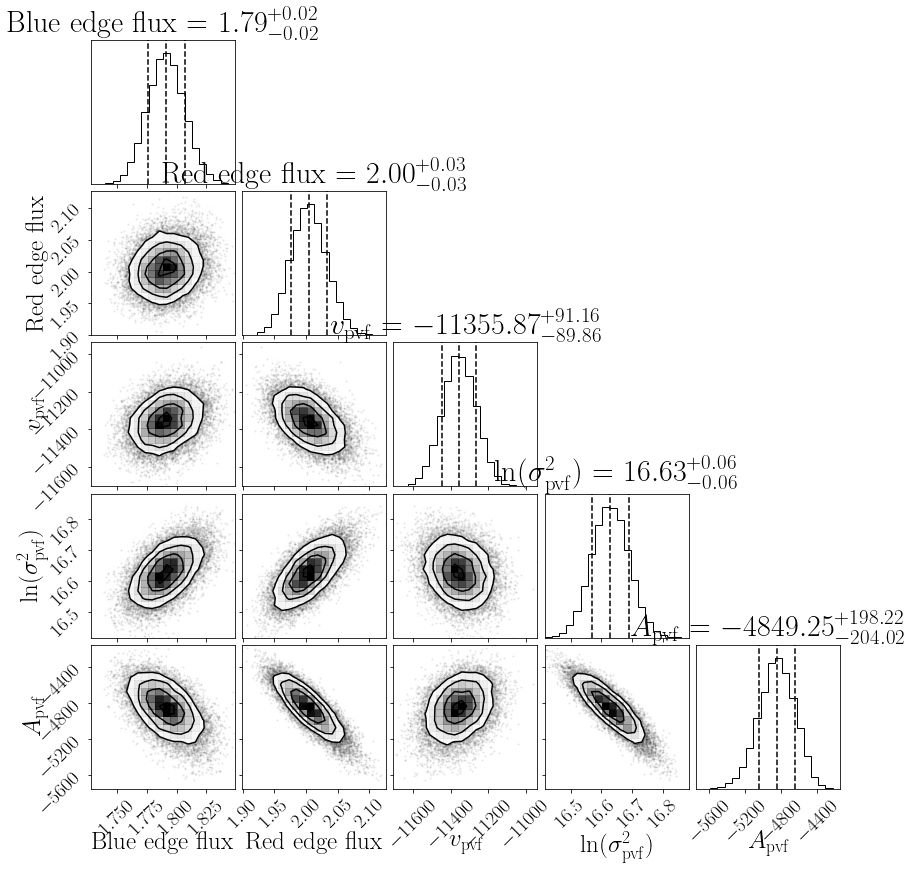

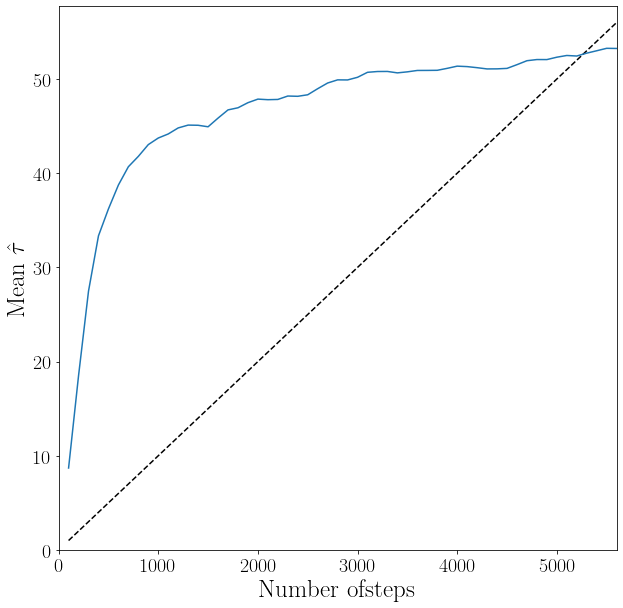

In [6]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

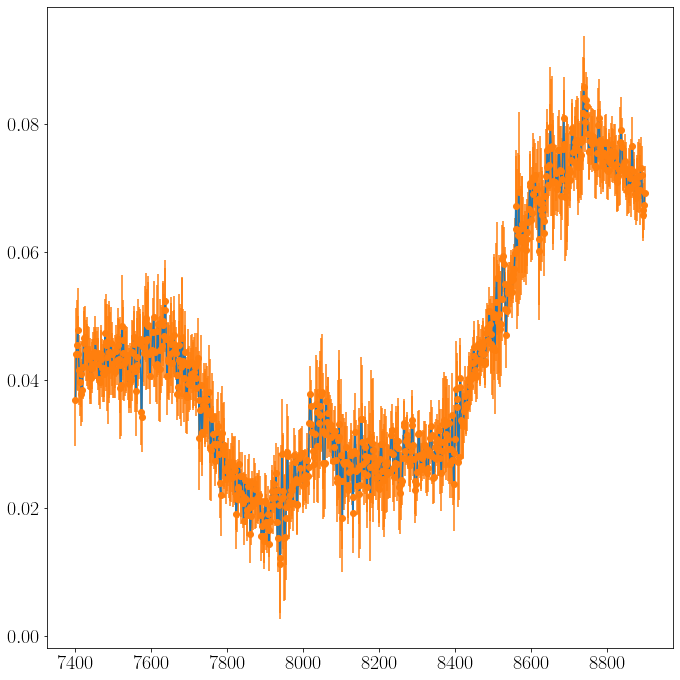

In [7]:
Spec1.plot_line_region(7400, 8900)

In [8]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

567 points within 7600.00 and 8700.00 angstroms.


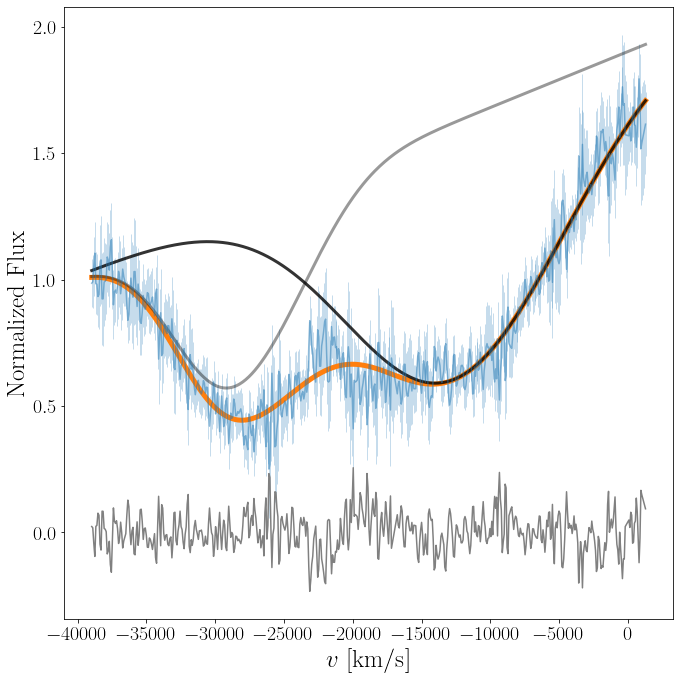

LS estimation:
Velocity pvf: -9247 km/s
Velocity hvf: -24832 km/s


In [9]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

  0%|          | 4/50000 [00:00<23:29, 35.48it/s]

MCMC results:
Velocity pvf: -10796 pm 76 km/s
Velocity hvf: -25401 pm 115 km/s


 17%|█▋        | 8300/50000 [04:34<22:58, 30.24it/s]  


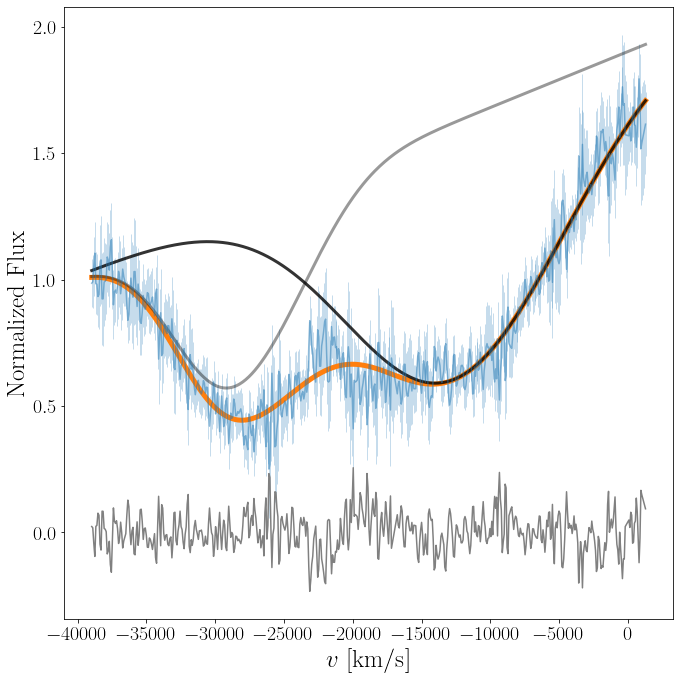

MCMC results:
Velocity pvf: -10797 pm 78 km/s
Velocity hvf: -25407 pm 117 km/s


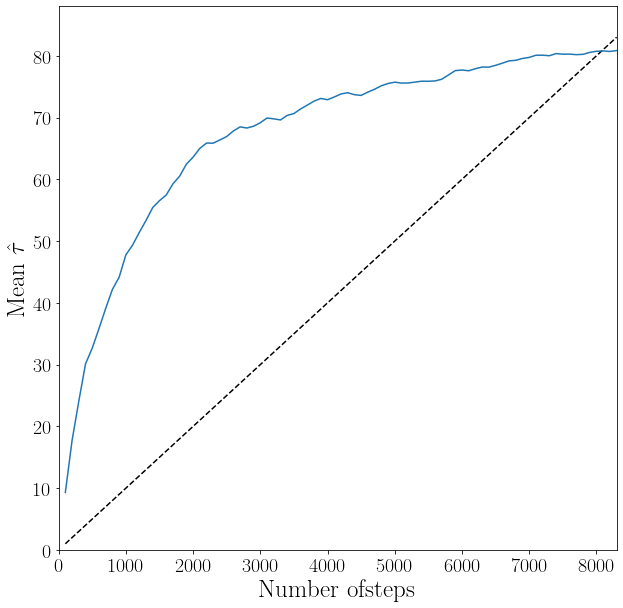

In [10]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[],
                                              normalize_unc=True,
                                              max_nsteps=2000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=Spec1.line['CaII_IRT'].theta_MCMC,
                                              normalize_unc=True,
                                              #Plot_mcmc=True,
                                              Plot_tau=True)